# Imports

In [77]:
import numpy as np
import pandas as pd
from sklearn import tree
import sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

In [17]:
# Input the 2019 Dataset
df = pd.read_csv('Data/2019_data.csv')

/Users/nathanielyzer/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
# Display import
df.head(-5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,...,Context,Local Authority District code (2019),Local Authority District name (2019),Employment Domain Score,Income Domain Score,IDACI Score,IDAOPI Score,Police Strength,Police Funding,Population
0,a8977a2a4e14252420371eb993d52e4d0b8288a7c833e6...,2019-01,Metropolitan Police Service,Metropolitan Police Service,-0.709911,50.784615,On or near Rochester Way,E01031384,Arun 018E,Violence and sexual offences,...,NaN,E07000224,Arun,"0,054","0,058","0,055","0,069","30,435",2572,154.414
1,NaN,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
2,934e173f2bc2e1dd3a257b37939d8f97575d3eeb89ff0c...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Burglary,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
3,4f5b7e424bc78b1fb8c32e07da61176d2cbc5a3849d8e1...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.140634,51.583427,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Burglary,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
4,53d960600a4a9f54b785f598af4c75bdef2f79bce1a41b...,2019-01,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Drugs,...,NaN,E09000002,Barking and Dagenham,"0,146","0,216","0,276","0,231","30,435",2572,198.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348331,ca9365d6f6df6f218a06f1f32fb907061018f461bedad2...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.068596,50.904531,On or near Carendon Close,E01023233,Winchester 014D,Violence and sexual offences,...,NaN,E07000094,Winchester,"0,047","0,055","0,068","0,082","2,697",315,119.218
2348332,091eb729242fa5503d83ae27e679b1986e48ed6da90fb0...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.072551,50.903762,On or near Green Lane,E01023233,Winchester 014D,Violence and sexual offences,...,NaN,E07000094,Winchester,"0,047","0,055","0,068","0,082","2,697",315,119.218
2348333,0af34965867602d016c3e98b34f59c1e3c6828260ca90f...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.074427,50.905233,On or near Glasspool,E01023233,Winchester 014D,Violence and sexual offences,...,NaN,E07000094,Winchester,"0,047","0,055","0,068","0,082","2,697",315,119.218
2348334,8e008c4280a3ef3cdfb7046444b988dbdb1f612d989fd2...,2019-12,Hampshire Constabulary,Hampshire Constabulary,-1.063798,50.902649,On or near Ashling Gardens,E01023234,Winchester 014E,Burglary,...,NaN,E07000094,Winchester,"0,064","0,091","0,093","0,142","2,697",315,119.218


In [19]:
# Drop required values that contain NAN
df.dropna(subset=['LSOA code', 'Month', 'Location', 'Crime type', 'Longitude', 'Latitude', 'Employment Domain Score',
       'Income Domain Score', 'IDACI Score', 'IDAOPI Score', 'Police Strength',
       'Police Funding', 'Population'], inplace=True)

In [20]:
df[df['Month'] == '2019-05']['Crime type'].mode()

0    Violence and sexual offences
dtype: object

In [21]:
for month in df['Month'].unique():
    print(month)
    print(df[df['Month'] == month]['Crime type'].mode())

2019-01
0    Violence and sexual offences
dtype: object
2019-02
0    Violence and sexual offences
dtype: object
2019-03
0    Violence and sexual offences
dtype: object
2019-04
0    Violence and sexual offences
dtype: object
2019-05
0    Violence and sexual offences
dtype: object
2019-06
0    Violence and sexual offences
dtype: object
2019-07
0    Violence and sexual offences
dtype: object
2019-08
0    Violence and sexual offences
dtype: object
2019-09
0    Violence and sexual offences
dtype: object
2019-10
0    Violence and sexual offences
dtype: object
2019-11
0    Violence and sexual offences
dtype: object
2019-12
0    Violence and sexual offences
dtype: object


In [22]:
df.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context',
       'Local Authority District code (2019)',
       'Local Authority District name (2019)', 'Employment Domain Score',
       'Income Domain Score', 'IDACI Score', 'IDAOPI Score', 'Police Strength',
       'Police Funding', 'Population'],
      dtype='object')

In [23]:
df.replace(to_replace=",", value=".", regex=True, inplace=True)

In [24]:
df['Population'].isnull().sum()

0

In [25]:
df['Police Strength'].isnull().sum()

0

In [26]:
df['Population'] = df['Population'].str.replace('.', '').fillna(df['Population']*1000)

/Users/nathanielyzer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [27]:
df['Police Strength'] = df['Police Strength'].str.replace('.','')

/Users/nathanielyzer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


# Crime Type Prediction

In [28]:
# Encode Desired Values to integers to use in models
ohe = LabelEncoder()
df['E LSOA code'] = ohe.fit_transform(df['LSOA code'].dropna().values)
df['E Month'] = ohe.fit_transform(df['Month'].dropna().values)
df['E Location'] = ohe.fit_transform(df['Location'].dropna().values)

In [29]:
# Create an X and Y
X = df[['E LSOA code', 'E Month', 'E Location', 'Longitude', 'Latitude', 'Employment Domain Score',
       'Income Domain Score', 'IDACI Score', 'IDAOPI Score', 'Police Strength',
       'Police Funding', 'Population']].values
Y = df['Crime type'].values

In [30]:
# Fit Decision Tree on Crime Types and split the dataset in training and data.
clf = tree.DecisionTreeClassifier(max_depth=10)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [31]:
# Predictions on Test Set
preds = clf.predict(X_test)

In [32]:
accuracy_score(y_test, preds)

0.3023001475566357

In [33]:
# Predictions in a Dataframe
df_preds = pd.DataFrame()
df_preds['y'] = y_test
df_preds['pred'] = preds

In [34]:
df_preds

,y,pred
0,Shoplifting,Violence and sexual offences
1,Robbery,Violence and sexual offences
2,Violence and sexual offences,Anti-social behaviour
3,Anti-social behaviour,Violence and sexual offences
4,Criminal damage and arson,Violence and sexual offences
...,...,...
230415,Bicycle theft,Other theft
230416,Violence and sexual offences,Anti-social behaviour
230417,Violence and sexual offences,Violence and sexual offences
230418,Shoplifting,Shoplifting


In [35]:
# Accuracy
len(df_preds.loc[df_preds['y'] == df_preds['pred']]) / len(y_test)

0.3023001475566357

In [36]:
df_preds['y'].value_counts()

Violence and sexual offences    60988
Anti-social behaviour           44148
Other theft                     21663
Vehicle crime                   20596
Criminal damage and arson       16644
Burglary                        14666
Public order                    13233
Shoplifting                     11483
Drugs                            7277
Theft from the person            6284
Robbery                          4845
Bicycle theft                    3736
Other crime                      3243
Possession of weapons            1614
Name: y, dtype: int64

In [37]:
df_preds['pred'].value_counts()

Violence and sexual offences    132062
Anti-social behaviour            66189
Other theft                      15056
Shoplifting                      11688
Theft from the person             2678
Vehicle crime                     2279
Drugs                              148
Burglary                           147
Other crime                         77
Bicycle theft                       65
Criminal damage and arson           15
Possession of weapons               15
Public order                         1
Name: pred, dtype: int64

In [41]:
balanced_accuracy_score(df_preds['y'].values, df_preds['pred'].values)

0.13067339856724494

In [53]:
accuracies = {}
for crime in df_preds['y'].unique():
    crime_y = df_preds.loc[df_preds['y'] == crime, 'y'].values
    crime_pred = df_preds.loc[df_preds['y'] == crime, 'pred'].values
    acc = round(accuracy_score(crime_y,crime_pred) * 100,2)
    accuracies[crime] = acc
#     print('Accuracy for {} is {}%'.format(crime,acc))
df_crimes = pd.DataFrame.from_dict(accuracies, orient='index').sort_values(0, ascending=False)
df_crimes

,0
Violence and sexual offences,69.96
Anti-social behaviour,38.33
Shoplifting,33.17
Other theft,21.49
Theft from the person,13.91
Vehicle crime,2.73
Other crime,1.33
Drugs,0.69
Bicycle theft,0.56
Possession of weapons,0.50


In [58]:
counts = {}
for crime in df_preds['y'].unique():
    c = round((len(df_preds[df_preds['y'] == crime]) / len(df_preds)) *100,2)
    counts[crime] = c
df_crimes['Relativity'] = df_crimes.index.map(counts)
df_crimes

,0,Relativity
Violence and sexual offences,69.96,26.47
Anti-social behaviour,38.33,19.16
Shoplifting,33.17,4.98
Other theft,21.49,9.40
Theft from the person,13.91,2.73
Vehicle crime,2.73,8.94
Other crime,1.33,1.41
Drugs,0.69,3.16
Bicycle theft,0.56,1.62
Possession of weapons,0.50,0.70


In [118]:
#df_preds['y'].value_counts().plot(kind='barh')
x = [str(x) for x in df_preds['y'].value_counts().sort_index().index.values]
y = df_preds['y'].value_counts().sort_index().values
y2 = [len(df_preds[df_preds['pred'] == crime]) for crime in x]
len(x), len(y), len(y2)

(14, 14, 14)

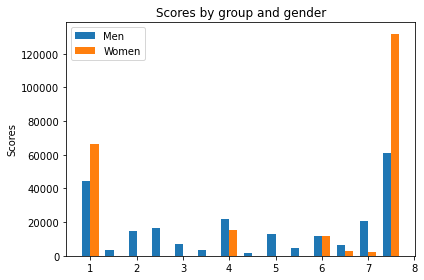

In [117]:
labels = x
men_means = y
women_means = y2

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticklabels(x)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()